In [25]:
import cv2
import numpy as np
import os
import PIL
from PIL import Image
import random
from tqdm import tqdm
import pickle


import torch
import glob
import torch.nn as nn
import torch.nn.functional as func
from torchvision.transforms import transforms
from torch.utils.data import DataLoader
from torch.optim import Adam
from torch.autograd import Variable
import torchvision
import pathlib
3
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [26]:
train_path='C:/Users/joshu/OneDrive/A levels/Other/Crest/Crest code/imgRecognition/signal_frames/silhouettes'
pred_path='C:/Users/joshu/OneDrive/A levels/Other/Crest/Crest code/imgRecognition/signal_frames/pred_silhouettes'

In [27]:
#categories
root=pathlib.Path(train_path)
classes=sorted([j.name.split('/')[-1] for j in root.iterdir()])
print(classes)

['backwards', 'downwards', 'forwards', 'left', 'right', 'upwards']


In [28]:
#CNN Network


class ConvNet(nn.Module):
    def __init__(self,num_classes=6):
        super(ConvNet,self).__init__()
        
        #Output size after convolution filter
        #((w-f+2P)/s) +1
        #((width-kernel_size+2Padding)/stride) +1
        
        #Input shape= (64,1,150,150)
        #batch_size = 64
        #channels =1 hopefully not 3 fix?
        #height/width=150
        #stride=1
        #Padding=1
        #kernel_size(f)=3
        #(batch size,channels,height width)
        
        self.conv1=nn.Conv2d(in_channels=1,out_channels=12,kernel_size=3,stride=1,padding=1)
        #Shape= (64,12,150,150)
        self.bn1=nn.BatchNorm2d(num_features=12)
        #normalisation
        #Shape= (64,12,150,150)
        self.relu1=nn.ReLU()
        #Shape= (64,12,150,150)
        
        self.pool=nn.MaxPool2d(kernel_size=2)
        #Reduce the image size be factor 2
        #Shape= (64,12,75,75)
        
        
        self.conv2=nn.Conv2d(in_channels=12,out_channels=20,kernel_size=3,stride=1,padding=1)
        #Shape= (64,20,75,75)
        self.relu2=nn.ReLU()
        #Shape= (64,20,75,75)
        
        
        
        self.conv3=nn.Conv2d(in_channels=20,out_channels=32,kernel_size=3,stride=1,padding=1)
        #Shape= (64,32,75,75)
        self.bn3=nn.BatchNorm2d(num_features=32)
        #Shape= (64,32,75,75)
        self.relu3=nn.ReLU()
        #Shape= (64,32,75,75)
        
        
        self.fc=nn.Linear(in_features=75 * 75 * 32,out_features=num_classes)
        
        
        
        #Feed forwad function
        
    def forward(self,input):
        output=self.conv1(input)
        output=self.bn1(output)
        output=self.relu1(output)
            
        output=self.pool(output)
            
        output=self.conv2(output)
        output=self.relu2(output)
            
        output=self.conv3(output)
        output=self.bn3(output)
        output=self.relu3(output)
            
            
            #Above output will be in matrix form, with shape (256,32,75,75)
            
        output=output.view(-1,32*75*75)
            
            
        output=self.fc(output)
            
        return output
            
        

In [29]:
checkpoint=torch.load('best_checkpoint.pth')
model=ConvNet(num_classes=6)
model.load_state_dict(checkpoint)
model.eval()

ConvNet(
  (conv1): Conv2d(1, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU()
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(12, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (conv3): Conv2d(20, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu3): ReLU()
  (fc): Linear(in_features=180000, out_features=6, bias=True)
)

In [30]:
#Transforms
transformer=transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((150,150)),
    transforms.ToTensor(),  #0-255 to 0-1, numpy to tensors
    transforms.Normalize((0.5), (0.5))
    
])

In [31]:
#prediction function
def prediction(img_path,transformer):
    
    image=Image.open(img_path)
    
    image_tensor=transformer(image).float()
    
    
    image_tensor=image_tensor.unsqueeze_(0)
    
    #if torch.cuda.is_available():
    #    image_tensor.cuda()
        

    output=model(Variable(image_tensor))
    
    index=output.data.numpy().argmax()
    
    pred=classes[index]
    
    return pred

In [32]:
images_path=glob.glob(pred_path+'/*.jpg')

In [33]:
pred_dict={}

for i in images_path:
    pred_dict[i[i.rfind('/')+1:]]=prediction(i,transformer)

In [34]:
pred_dict

{'pred_silhouettes\\backwards_1.jpg': 'backwards',
 'pred_silhouettes\\backwards_267.jpg': 'backwards',
 'pred_silhouettes\\backwards_348.jpg': 'backwards',
 'pred_silhouettes\\backwards_42.jpg': 'backwards',
 'pred_silhouettes\\backwards_689.jpg': 'backwards',
 'pred_silhouettes\\backwards_fake_1.jpg': 'backwards',
 'pred_silhouettes\\backwards_new_1.jpg': 'backwards',
 'pred_silhouettes\\backwards_new_2.jpg': 'backwards',
 'pred_silhouettes\\backwards_new_3.jpg': 'backwards',
 'pred_silhouettes\\backwards_new_4.jpg': 'backwards',
 'pred_silhouettes\\backwards_new_5.jpg': 'backwards',
 'pred_silhouettes\\blank_1.jpg': 'forwards',
 'pred_silhouettes\\downwards_1.jpg': 'downwards',
 'pred_silhouettes\\downwards_14.jpg': 'downwards',
 'pred_silhouettes\\downwards_160.jpg': 'downwards',
 'pred_silhouettes\\downwards_27.jpg': 'downwards',
 'pred_silhouettes\\downwards_3.jpg': 'downwards',
 'pred_silhouettes\\downwards_370.jpg': 'downwards',
 'pred_silhouettes\\downwards_505.jpg': 'downward

In [35]:
DATADIR = "C:/Users/joshu/OneDrive/A levels/Other/Crest/Crest code/imgRecognition/signal_frames/pred_silhouettes"

#CATEGORIES = ["backwards", "downwards", "forwards", "left", "right", "upwards"]

### Applying model to pred data

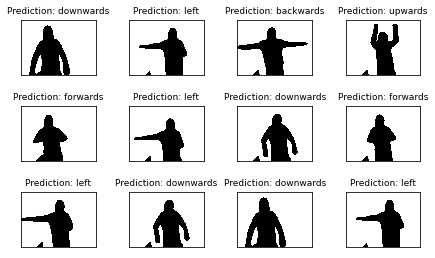

In [36]:
fig = plt.figure()
for i in range(12):
    path = DATADIR
    file = random.choice(os.listdir(path))
    plt.subplot(3,4,i+1)
    plt.tight_layout()
    img_array = cv2.imread(os.path.join(path,file) ,cv2.IMREAD_GRAYSCALE)  
    plt.imshow(img_array, cmap='gray', interpolation='none')  # graph it
    prediction_pred = prediction(path+"/"+file,transformer)
    label = file.split('_', 1)[0].replace('.', '')
    #plt.title(("Label: " + label + "   " + "Prediction: " + prediction_pred),c='black',fontsize = 9)
    plt.title(("Prediction: " + prediction_pred),c='black',fontsize = 9)
    if label != prediction_pred:
        plt.title(("Prediction: " + prediction_pred + " \n Label: " + label),fontsize = 9,c='red')
    #plt.show()  # display!

    plt.xticks([])
    plt.yticks([])
#note: these are technically unlabelled but I wrote their made up label in the file name

In [37]:
#prediction function
def prediction(img_path,transformer):
    
    image=Image.open(img_path)
    
    image_tensor=transformer(image).float()
    
    
    image_tensor=image_tensor.unsqueeze_(0)
    
    #if torch.cuda.is_available():
    #    image_tensor.cuda()
        
    input=Variable(image_tensor)
    
    
    output=model(input)
    
    index=output.data.numpy().argmax()
    
    pred=classes[index]
    
    output = func.softmax(output,dim = 1)
    max_output,prediction_output = torch.max(output,dim=1)
    max_output = max_output.detach()
    max_output = max_output.numpy()*100
    max_output = max_output[0]
    
    return (max_output,pred)

In [38]:
path = DATADIR
file = 'left_fake_1.jpg'

img_path = path+"/"+file

image=Image.open(img_path)

image_tensor=transformer(image).float()

image_tensor=image_tensor.unsqueeze_(0)

output=model(Variable(image_tensor))
print(output)

index=output.data.numpy().argmax()
print(index)

pred=classes[index]
print(pred)

tensor([[  8.9370, -20.9948,  -1.1384,  99.1954, -83.8852,   1.9763]],
       grad_fn=<AddmmBackward>)
3
left


In [39]:
output.data.shape

torch.Size([1, 6])

In [40]:
output.data

tensor([[  8.9370, -20.9948,  -1.1384,  99.1954, -83.8852,   1.9763]])

In [41]:
output = func.softmax(output,dim = 1)
print("Total: ",output.data[:1].sum())
output.data[:1]

Total:  tensor(1.)


tensor([[6.3281e-40, 0.0000e+00, 2.6625e-44, 1.0000e+00, 0.0000e+00, 5.9976e-43]])

In [42]:
max_output,prediction_output = torch.max(output,dim=1)
print(max_output)
max_output = max_output.detach()
print(prediction_output)
print(max_output)
max_output = max_output.numpy()*100
print(max_output)
print(classes[prediction_output])

tensor([1.], grad_fn=<MaxBackward0>)
tensor([3])
tensor([1.])
[100.]
left


### For testing images at their exact location

In [43]:
def testing_img(file):
    path = "C:/Users/joshu/OneDrive/A levels/Other/Crest/Crest code/imgRecognition/signal_frames/pred_silhouettes"
    #file = random.choice(os.listdir(path))
    img_array = cv2.imread(os.path.join(path,file) ,cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array, cmap='gray', interpolation='none')
    prediction_pred = prediction(path+"/"+file,transformer)
    certainty = str(prediction_pred[0])
    prediction_pred = prediction_pred[1]
    label = file.split('_', 1)[0].replace('.', '')
    plt.title(("Prediction: " + prediction_pred + " \n Label: " + label + " \n Certainty: " + certainty),c='black',fontsize = 12.5)
    if label != prediction_pred:
        plt.title(("Prediction: " + prediction_pred + " \n Label: " + label + " \n Certainty: " + certainty),fontsize = 12.5,c='red')

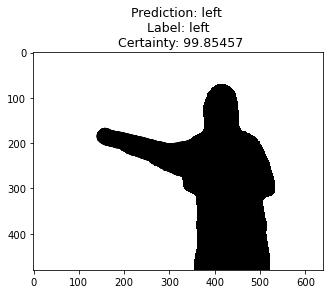

In [44]:
#testing model against fake images drawn in 3D paint
testing_img('left_fake_2.jpg')

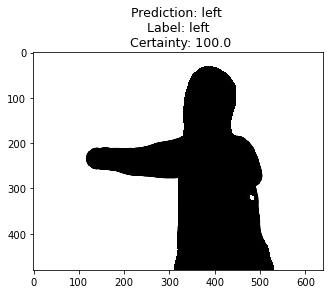

In [45]:
testing_img('left_fake_1.jpg')

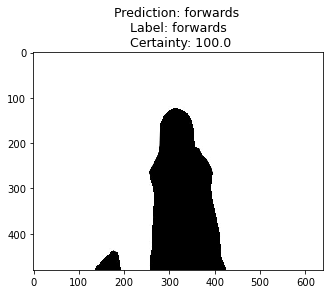

In [46]:
testing_img('forwards_no_arms_1.jpg')

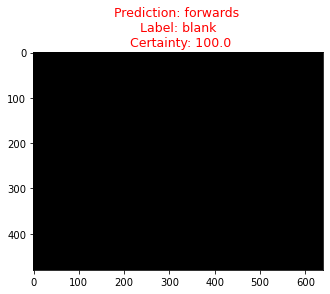

In [47]:
testing_img('blank_1.jpg')

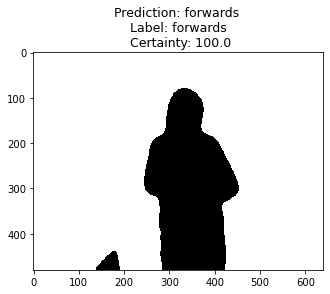

In [48]:
path = "C:/Users/joshu/OneDrive/A levels/Other/Crest/Crest code/imgRecognition/signal_frames/pred_silhouettes"
testing_img(random.choice(os.listdir(path)))